# 03.4 Ejercicio de Clustering con fichero de semillas

El objetivo del cuaderno es hacer una agrupación del archivo de semillas según sus características y ver que tal separa en sus diferentes etiquetas

Para calcular la tasa de aciertos visualmente asignaremos los cluster generados a las etiquetas reales. En la rutina de recuento se utiliza la variable __equivalencia__ para indicar dicha correspondencia.

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from skimage import io
from IPython import display

Se va a utilizar __K-means__ y varios __métodos jerárquicos__ para agrupar 210 instancias de __semillas de trigo__. El conjunto de datos esta en el archivo seeds.csv que puedes descargar de Moodle. Se muestrearon aleatoriamente 70 semillas de tres variedades de trigo; kama, rosa y canadiense (listados como 1, 2 y 3 en la columna species class).

De las 210 observaciones se midieron, utilizando tecnicas precisas, los siguientes atributos: __"área, perímetro, compactividad, longitud, anchura, coeficiente de asimetría, longitud del canal"__.

## Carga del archivo en un dataframe

In [2]:
df = pd.read_csv('data/seeds.csv')
df.head()

area  perimeter  compactness  length  width  asymmetry  groove_length  \
0  15.26      14.84       0.8710   5.763  3.312      2.221          5.220   
1  14.88      14.57       0.8811   5.554  3.333      1.018          4.956   
2  14.29      14.09       0.9050   5.291  3.337      2.699          4.825   
3  13.84      13.94       0.8955   5.324  3.379      2.259          4.805   
4  16.14      14.99       0.9034   5.658  3.562      1.355          5.175   

   species_class  
0              1  
1              1  
2              1  
3              1  
4              1

### Se estandariza el conjunto de datos

Con eso se evita que la diferencias de magnitud entre cada característica afecte al clustering

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[["area","perimeter","compactness","length","width","asymmetry","groove_length"]] = sc.fit_transform(df[["area",
    "perimeter","compactness","length","width","asymmetry","groove_length"]])
df.head()

area  perimeter  compactness    length     width  asymmetry  \
0  0.142098   0.215462     0.000061  0.304218  0.141702  -0.986152   
1  0.011188   0.008224     0.428515 -0.168625  0.197432  -1.788166   
2 -0.192067  -0.360201     1.442383 -0.763637  0.208048  -0.667479   
3 -0.347091  -0.475333     1.039381 -0.688978  0.319508  -0.960818   
4  0.445257   0.330595     1.374509  0.066666  0.805159  -1.563495   

   groove_length  species_class  
0      -0.383577              1  
1      -0.922013              1  
2      -1.189192              1  
3      -1.229983              1  
4      -0.475356              1

### Construcción de la matriz X de características + la matriz y de etiquetas

- Las características están en las 7 primeras columnas
- Las etiquetas en la columna 8 (species_class)

### Visualización gráfica de los datos

Se presenta en un gráfico bidimensional dos de las características (área y perímetro) y la etiqueta que identifica cada clase en y se representa con una viñeta distinta al dibujar el punto.

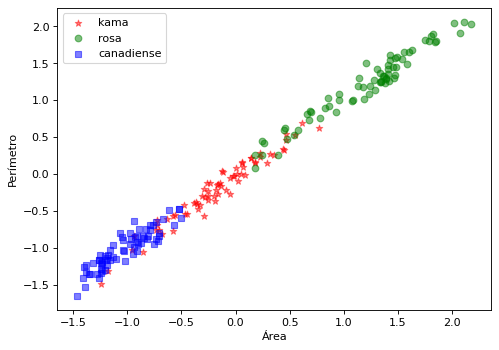

Se llevará a cabo una agrupación de 3 grupos (__n_cluster__), se ejecuta el algoritmo 10 veces (__n_init__) independientemente con diferentes centroides aleatorios para elegir el modelo final que tiene el SSE más bajo. Se elege una tolerancia (__tol__) de 0.0001 ($10^{-4}$) para controlar la convergencia de los mínimos cuadrados.

Un problema con k-means es que uno o más grupos pueden estar vacíos. Sin embargo, en la implementación actual de kmeans en scikit-learn, si un grupo está vacío, el algoritmo buscará la muestra más alejada del centroide del grupo vacío. Luego reasignará el centroide para que sea el punto más alejado.

array([0, 1, 2])

__Mostrar las coordenadas de los centroides usando un DataFrame__

La visualización del ajuste realizado es el siguiente:

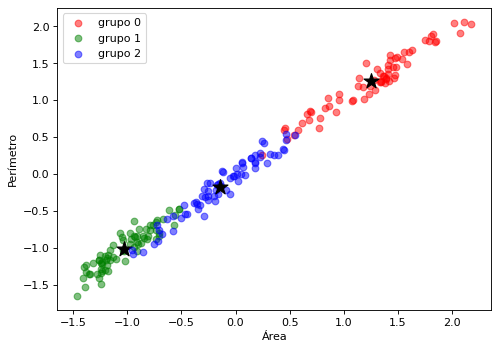

### Se evalúa la calidad del método

Calcular los índices __R__ , __ARI__ , __VI__ y __AVI__ comparando contra las etiquetas reales de 'species_class' .

## Nuevo proceso con Cluster jerárquico

Se resuelve un cluster aglomerativo con __scikit-learn__ que es __AgglomerativeClustering__:

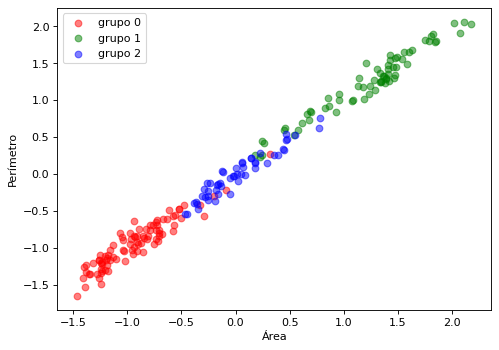

### Se evalúa la calidad del método

Calcular los índices __R__ , __ARI__ , __VI__ y __AVI__ comparando contra las etiquetas reales de 'species_class' .

__¿Qué clustering ha resultado más optimo?__

## Estudio del número de grupos óptimos (gráfico del codo y bic)